In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [247]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [248]:
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic['Survived']

In [249]:
X = pd.get_dummies(X, dtype=int)
X = X.fillna({'Age': X['Age'].median()})

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [251]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [252]:
accuracy_cv = cross_val_score(clf, X_train, y_train, cv=5)
accuracy_cv

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

средняя точность кросс-валидации

In [253]:
accuracy_cv.mean()

0.7886274509803922

In [254]:
max_depth_values = range(1, 100)

In [255]:
scores_data = pd.DataFrame()

In [256]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})

    scores_data = pd.concat([scores_data, temp_score_data])

In [257]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.802073
...,...,...,...,...
0,95,0.979866,0.769492,0.770182
0,96,0.979866,0.776271,0.768501
0,97,0.979866,0.776271,0.776905
0,98,0.979866,0.766102,0.766835


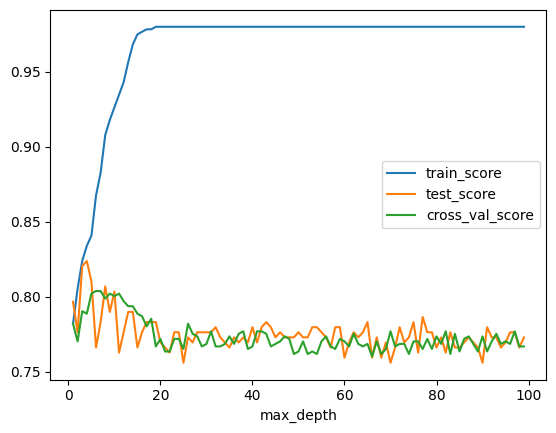

In [258]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score', 'cross_val_score']);

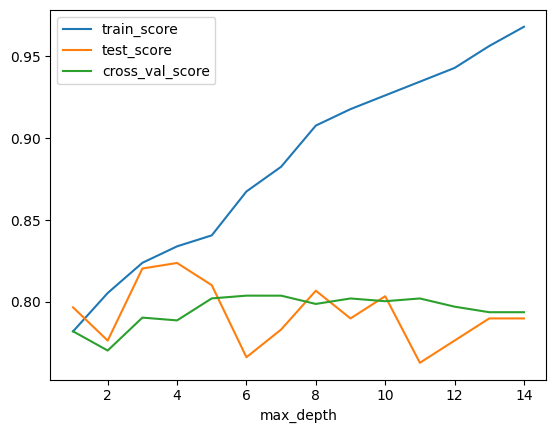

In [259]:
scores_data[scores_data['max_depth'] < 15].plot(x='max_depth', y=['train_score', 'test_score', 'cross_val_score']);

Лучший результат модель показывает на глубине 10 и 11

In [260]:
scores_data.head(20)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.802073
0,6,0.867450,0.766102,0.803754
0,7,0.882550,0.783051,0.803739
0,8,0.907718,0.806780,0.798683
0,9,0.917785,0.789831,0.802031
0,10,0.926174,0.803390,0.800350


In [261]:
scores_data.sort_values('cross_val_score', ascending=False).head(1)

,max_depth,train_score,test_score,cross_val_score
0,6,0.86745,0.766102,0.803754


In [262]:
max_depth = scores_data.sort_values('cross_val_score', ascending=False).head(1)['max_depth'].values[0]
max_depth

6

In [263]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

In [264]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [265]:
best_clf.score(X_test, y_test)

0.7694915254237288

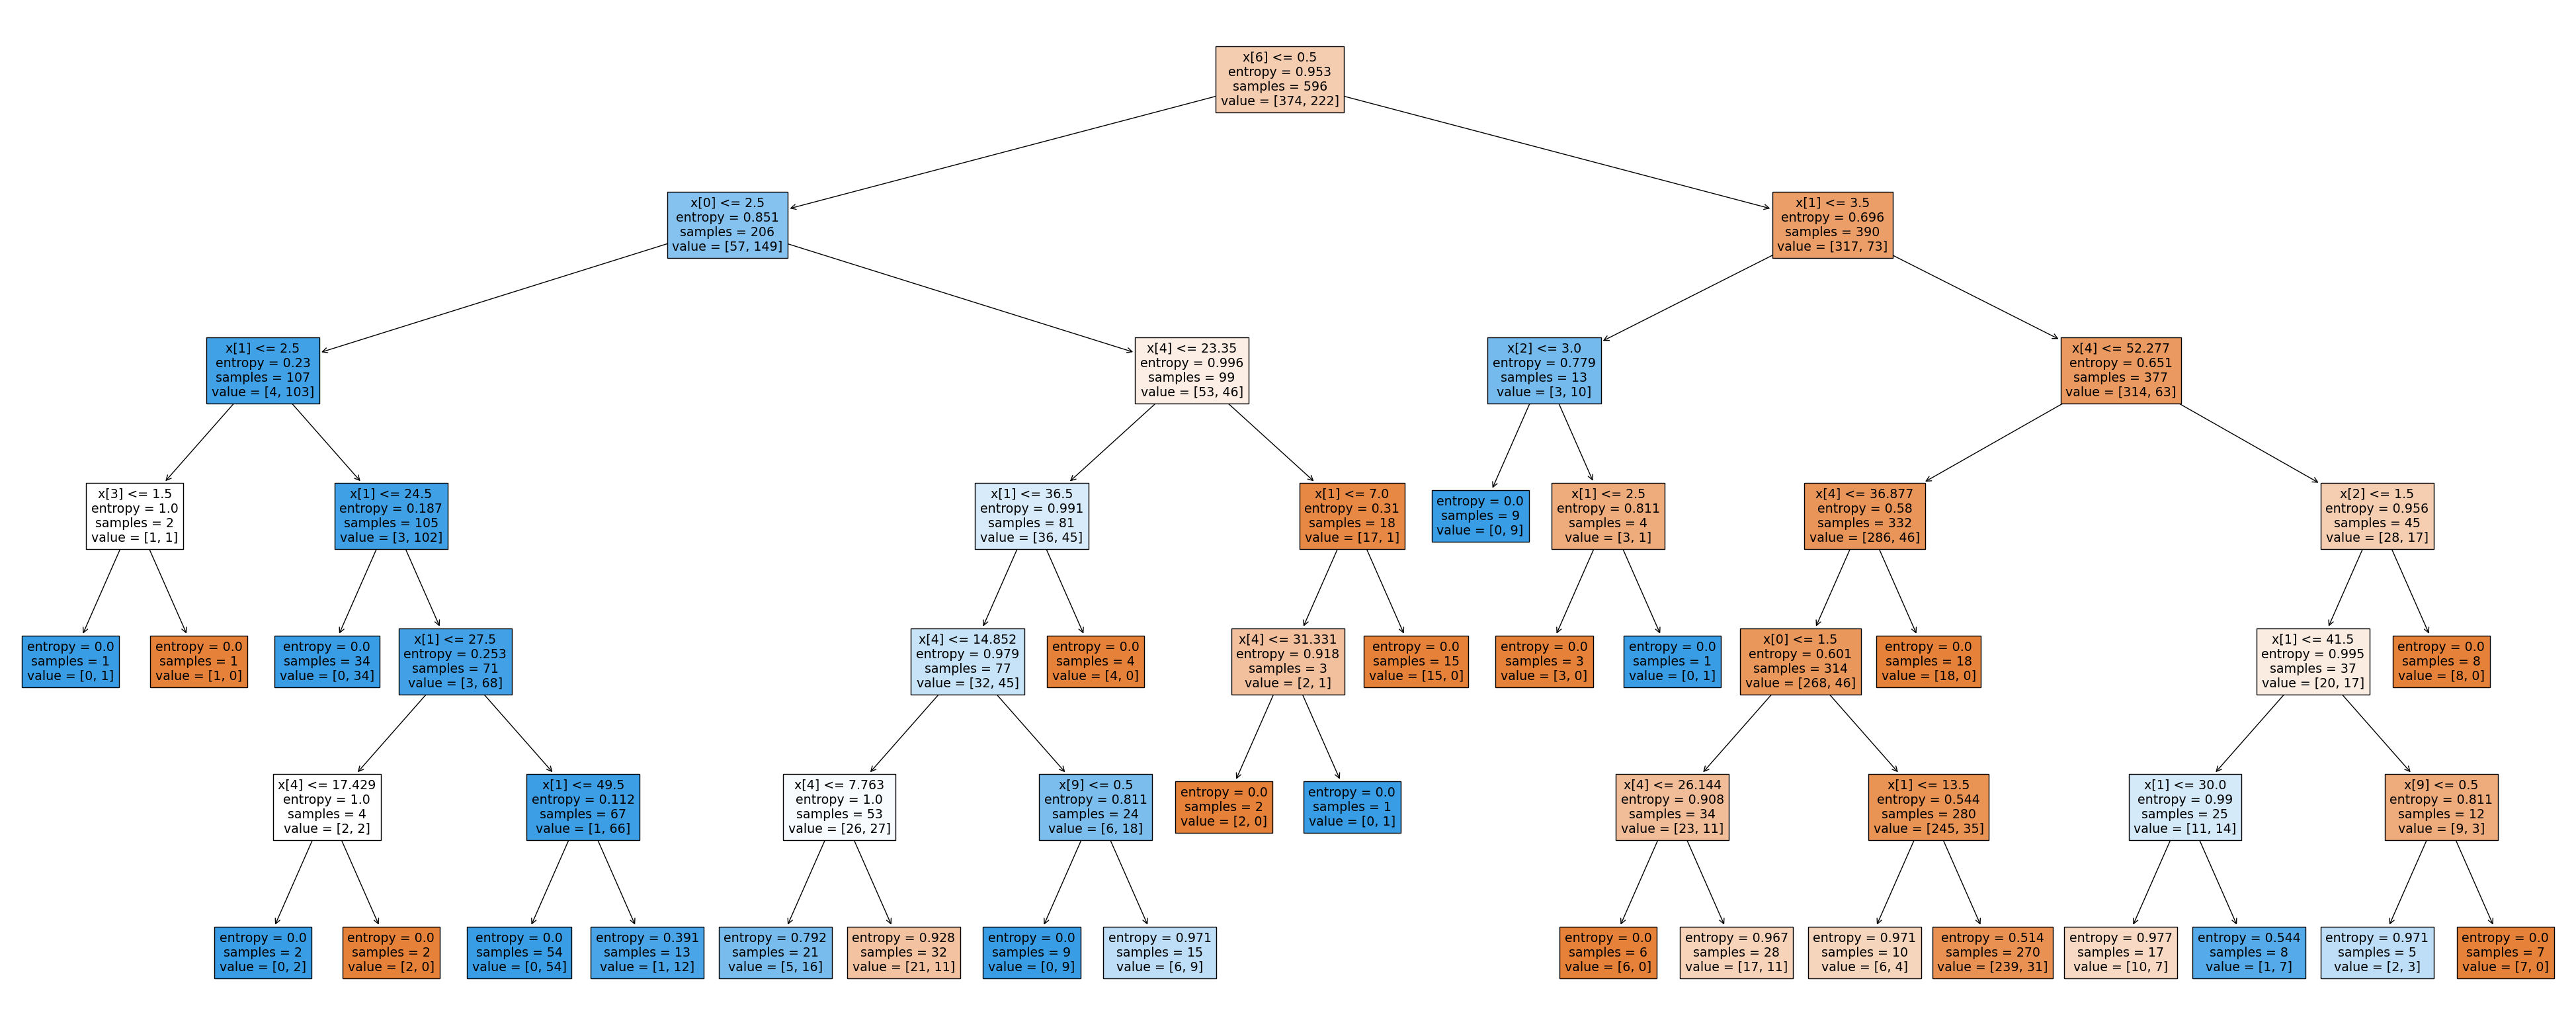

In [267]:
plt.figure(figsize=(50, 20))
plot_tree(best_clf, filled=True);